In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [7]:
# Load the dataset
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date', dayfirst=True)
df.index = pd.to_datetime(df.index, format='%d-%m-%Y %H:%M')  # Ensure proper forma


In [8]:
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [4]:
print(df.head())
print(df.info())


                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849
<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB
None


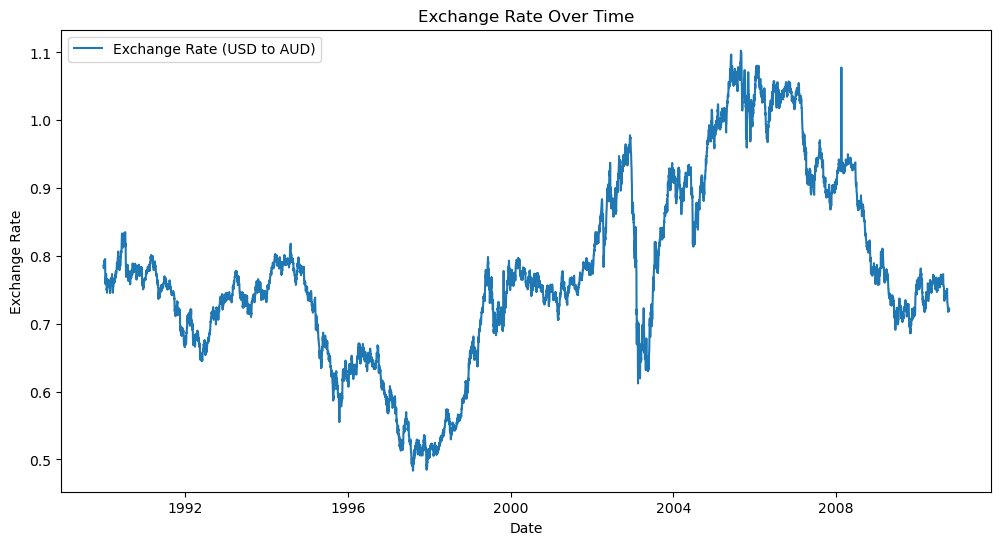

In [9]:
# Plot the data
plt.figure(figsize=(12,6))
plt.plot(df, label='Exchange Rate (USD to AUD)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.legend()
plt.show()


In [10]:
# Check stationarity
result = adfuller(df.iloc[:, 0])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -1.664994180738073
p-value: 0.44923273535983155


In [12]:
# Fit ARIMA model
arima_model = ARIMA(df.iloc[:, 0], order=(1,1,1)).fit()
print(arima_model.summary())

C:\Users\sschp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sschp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sschp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 03 Apr 2025   AIC                         -56102.322
Time:                        21:27:26   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.608      0.0

In [13]:
# Forecast using ARIMA
arima_forecast = arima_model.forecast(steps=30)
arima_forecast = pd.Series(arima_forecast, 
                           index=pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'))

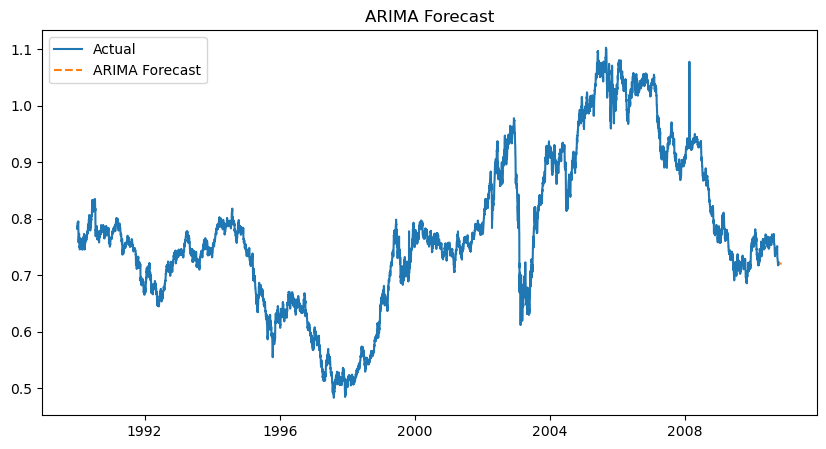

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df, label='Actual')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='dashed')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

In [15]:
# Fit Exponential Smoothing model
seasonal_periods = 12  # Adjust if needed
exp_model = ExponentialSmoothing(df.iloc[:, 0], trend='add', seasonal='add', seasonal_periods=seasonal_periods).fit()
exp_forecast = exp_model.forecast(30)
exp_forecast = pd.Series(exp_forecast, 
                         index=pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'))


C:\Users\sschp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


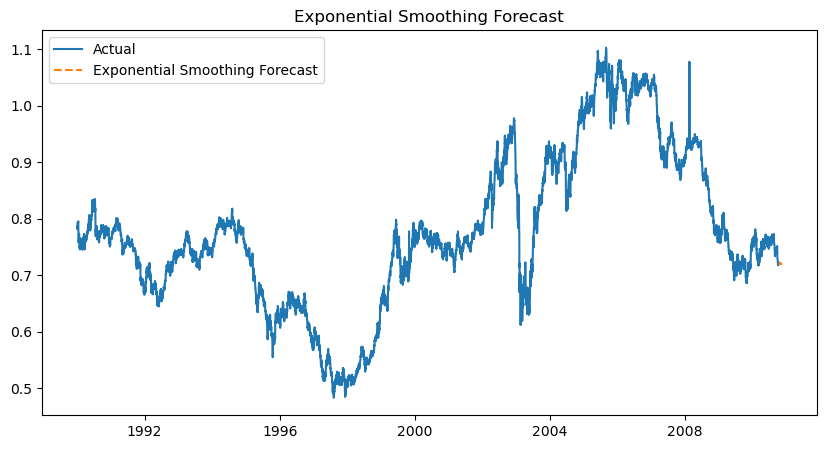

In [16]:
# Plot Exponential Smoothing Forecast
plt.figure(figsize=(10,5))
plt.plot(df, label='Actual')
plt.plot(exp_forecast, label='Exponential Smoothing Forecast', linestyle='dashed')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.show()

In [17]:
# Evaluate Models
actual = df.iloc[-30:, 0]  # Last 30 values
arima_mae = mean_absolute_error(actual, arima_forecast[:30])
exp_mae = mean_absolute_error(actual, exp_forecast[:30])
